<a href="https://colab.research.google.com/github/sarahwierzbicki/projects/blob/main/NYC_Taxi_Data_Analysis_of_March_and_May_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [ ]:
!pip install tensorflow-data-validation
!pip install apache-beam
import tensorflow_data_validation as tfdv
import tensorflow as tf
!apt-get -qq install -y graphviz && pip install -q pydot

read parquets

In [ ]:
!pip install fastparquet
import fastparquet
import pandas as pd
import numpy as np
import seaborn as sns

march_df = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine='fastparquet')
may_df = pd.read_parquet('yellow_tripdata_2020-05.parquet', engine='fastparquet')
january_df = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine='fastparquet')

march_df.info()
may_df.info()
may_df.head(5)
march_df.head(5)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007687 entries, 0 to 3007686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,NaN
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,NaN
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,NaN
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,NaN
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,NaN


In [ ]:
march_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.007687e+06,2.969879e+06,3.007687e+06,2.969879e+06,3.007687e+06,3.007687e+06,3.007687e+06,3.007687e+06,3.007687e+06,3.007687e+06,3.007687e+06,3.007687e+06,3.007687e+06,3.007687e+06,2.969879e+06,0.0
mean,1.671989e+00,1.467477e+00,3.117041e+00,1.051377e+00,1.634298e+02,1.609336e+02,1.251811e+00,1.269764e+01,1.246796e+00,6.580380e-01,2.138580e+00,3.042393e-01,2.975910e-01,1.884196e+01,2.268304e+00,NaN
std,4.728856e-01,1.120087e+00,2.069207e+02,7.109214e-01,6.658654e+01,7.074132e+01,4.941198e-01,3.871297e+02,2.883085e+02,2.883060e+02,2.719305e+00,1.607490e+00,3.710572e-02,6.945515e+02,7.494585e-01,NaN
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.259000e+03,-7.000000e+00,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00,NaN
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,NaN
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,NaN
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.985000e+01,2.500000e+00,NaN
max,6.000000e+00,9.000000e+00,2.698037e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,8.000000e+02,6.010200e+02,3.000000e-01,1.000004e+06,2.500000e+00,NaN


In [ ]:
may_df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,348415.000000,289514.000000,348415.000000,289514.000000,348415.000000,348415.000000,348415.000000,348415.000000,348415.000000,348415.000000,348415.000000,348415.000000,348415.000000,348415.000000,289514.000000,0.0
mean,1.630091,1.314171,8.333053,1.043062,152.597822,148.483274,1.182598,14.941814,0.956489,0.490151,1.427920,0.435664,0.297104,19.674323,2.037772,NaN
std,0.484691,0.983983,774.817906,0.969450,70.864142,74.815894,0.734705,727.741458,1.248844,0.083846,2.509258,1.910761,0.040553,727.873320,0.993473,NaN
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-240.000000,-4.500000,-0.500000,-11.060000,-13.750000,-0.300000,-244.300000,-2.500000,NaN
25%,1.000000,1.000000,1.050000,1.000000,90.000000,75.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.300000,2.500000,NaN
50%,2.000000,1.000000,1.990000,1.000000,143.000000,143.000000,1.000000,9.000000,0.000000,0.500000,0.010000,0.000000,0.300000,13.800000,2.500000,NaN
75%,2.000000,1.000000,4.250000,1.000000,231.000000,230.000000,2.000000,16.000000,2.500000,0.500000,2.450000,0.000000,0.300000,21.300000,2.500000,NaN
max,6.000000,9.000000,297004.510000,99.000000,265.000000,265.000000,4.000000,429496.720000,65.530000,3.300000,442.180000,200.000000,0.300000,429562.250000,2.500000,NaN


In [ ]:
march_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007687 entries, 0 to 3007686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
may_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348415 entries, 0 to 348414
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               348415 non-null  int64         
 1   tpep_pickup_datetime   348415 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  348415 non-null  datetime64[ns]
 3   passenger_count        289514 non-null  float64       
 4   trip_distance          348415 non-null  float64       
 5   RatecodeID             289514 non-null  float64       
 6   store_and_fwd_flag     289514 non-null  object        
 7   PULocationID           348415 non-null  int64         
 8   DOLocationID           348415 non-null  int64         
 9   payment_type           348415 non-null  int64         
 10  fare_amount            348415 non-null  float64       
 11  extra                  348415 non-null  float64       
 12  mta_tax                348415 non-null  floa

initial tfdv to show zeroes and outliers

In [ ]:
march_train = tfdv.generate_statistics_from_dataframe(dataframe= march_df)
may_test = tfdv.generate_statistics_from_dataframe(dataframe= may_df)
tfdv.visualize_statistics(lhs_statistics=may_test, rhs_statistics=march_train, lhs_name='may data', rhs_name= 'march data')

In [ ]:
# find intial outliers
marchDistance2 = march_df[(march_df['total_amount'] > 10000)]
print(marchDistance2)
marchDistance2.info()


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
732292          1  2020-03-04 17:09:26   2020-03-04 17:24:04              3.0   
1880017         2  2020-03-10 09:58:11   2020-03-10 10:09:46              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
732292             2.1         1.0                  N           166   
1880017            0.0        99.0                  N           193   

         DOLocationID  payment_type  fare_amount      extra   mta_tax  \
732292            143             4    671100.14       2.23       0.5   
1880017           193             2         2.50  500000.80  500000.5   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
732292          0.0           0.0                    0.3     671103.17   
1880017         0.0           0.0                    0.0    1000003.80   

         congestion_surcharge  airport_fee  
732292                    2.5          NaN  
1880017  

In [ ]:
#remove unneeded columns
march_df.drop('VendorID', axis = 1, inplace=True)
march_df.drop('store_and_fwd_flag', axis = 1, inplace=True)
march_df.drop('airport_fee', axis = 1, inplace=True)
may_df.drop('VendorID', axis = 1, inplace=True)
may_df.drop('store_and_fwd_flag', axis = 1, inplace=True)
may_df.drop('airport_fee', axis = 1, inplace=True)
may_df.drop('congestion_surcharge', axis = 1, inplace=True)
march_df.drop('congestion_surcharge', axis = 1, inplace=True)

In [ ]:
#remove negative tips
indexTip = march_df[(march_df['tip_amount'] < 0)].index
march_df.drop(indexTip, inplace = True)
indexTip = may_df[(may_df['tip_amount'] < 0)].index
may_df.drop(indexTip, inplace = True)
#remove outlier fares
marchFare = march_df[(march_df['fare_amount'] > 0) & (march_df['fare_amount'] < 200)]
mayFare = may_df[(may_df['fare_amount'] > 0) & (may_df['fare_amount'] < 200)]



In [ ]:
#remove outlier distances
marchDistance = marchFare[(marchFare['trip_distance'] > 0) & (march_df['trip_distance'] < 100)]
mayDistance = mayFare[(may_df['trip_distance'] > 0) & (may_df['trip_distance'] < 100)]

marchDistance.head(15)
mayDistance.tail(15)

<ipython-input-11-e9cd6b0ae476>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marchDistance = marchFare[(marchFare['trip_distance'] > 0) & (march_df['trip_distance'] < 100)]
<ipython-input-11-e9cd6b0ae476>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mayDistance = mayFare[(may_df['trip_distance'] > 0) & (may_df['trip_distance'] < 100)]


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
348400,2020-05-31 23:25:00,2020-05-31 23:51:00,NaN,12.36,NaN,82,218,0,39.01,0.0,0.5,0.0,0.00,0.3,39.81
348401,2020-05-31 23:09:00,2020-05-31 23:41:00,NaN,13.36,NaN,38,37,0,36.64,0.0,0.5,0.0,0.00,0.3,37.44
348402,2020-05-31 23:52:00,2020-06-01 00:11:00,NaN,3.99,NaN,37,188,0,14.42,0.0,0.5,0.0,0.00,0.3,15.22
348403,2020-05-31 23:26:00,2020-05-31 23:42:00,NaN,2.92,NaN,39,188,0,10.92,0.0,0.5,0.0,0.00,0.3,11.72
348404,2020-05-31 23:05:00,2020-05-31 23:40:00,NaN,28.16,NaN,55,119,0,81.70,0.0,0.5,0.0,6.12,0.3,88.62
348405,2020-05-31 23:50:00,2020-06-01 00:00:00,NaN,2.89,NaN,69,42,0,10.55,0.0,0.5,0.0,0.00,0.3,11.35
348406,2020-05-31 23:05:00,2020-05-31 23:22:00,NaN,3.48,NaN,82,95,0,25.80,0.0,0.5,0.0,0.00,0.3,26.60
348407,2020-05-31 23:29:41,2020-05-31 23:48:24,NaN,10.62,NaN,137,182,0,29.41,0.0,0.5,0.0,6.12,0.3,38.83
348408,2020-05-31 23:08:28,2020-05-31 23:23:07,NaN,9.43,NaN,227,4,0,29.65,0.0,0.5,0.0,0.00,0.3,32.95
348409,2020-05-31 23:58:00,2020-06-01 00:18:00,NaN,5.47,NaN,37,39,0,16.35,0.0,0.5,0.0,0.00,0.3,17.15


In [ ]:
# remove other payments besides 1
march_card = marchDistance[(marchDistance['payment_type'] == 1)]
may_card = mayDistance[(mayDistance['payment_type'] == 1)]

# drop NaN from RateCodeID and those not between 1 and 6
march_rate1 = march_card.dropna(subset=['RatecodeID'])
may_rate1 = may_card.dropna(subset=['RatecodeID'])
march_rate = march_rate1[(march_rate1['RatecodeID'] <= 6) & (march_rate1['RatecodeID'] >= 1)]
may_rate = may_rate1[(may_rate1['RatecodeID'] <= 6) & (may_rate1['RatecodeID'] >= 1)]

#drop NaN from passenger count
march_passenger = march_rate.dropna(subset=['passenger_count'])
may_passenger = may_rate.dropna(subset=['passenger_count'])


#filter for passengers
march_df_filtered = march_passenger[(march_passenger['passenger_count'] <= 6) & (march_passenger['passenger_count'] > 0)]
may_df_filtered = may_passenger[(may_passenger['passenger_count'] <= 6) & (may_passenger['passenger_count'] > 0)]


In [ ]:
#create column for tipped
march_df_filtered.loc[march_df_filtered['tip_amount'] == 0, 'tipped?'] = 'no'
march_df_filtered.loc[march_df_filtered['tip_amount'] > 0, 'tipped?'] = 'yes'
may_df_filtered.loc[may_df_filtered['tip_amount'] == 0, 'tipped?'] = 'no'
may_df_filtered.loc[may_df_filtered['tip_amount'] > 0, 'tipped?'] = 'yes'

print(march_df_filtered)
print(may_df_filtered)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0        2020-03-01 00:31:13   2020-03-01 01:01:42              1.0   
2        2020-03-01 00:52:18   2020-03-01 00:59:16              1.0   
3        2020-03-01 00:47:53   2020-03-01 00:50:57              2.0   
5        2020-03-01 00:04:43   2020-03-01 00:23:17              1.0   
6        2020-03-01 00:43:21   2020-03-01 01:14:36              1.0   
...                      ...                   ...              ...   
2969870  2020-03-31 23:36:21   2020-04-01 00:09:05              1.0   
2969875  2020-03-31 23:39:18   2020-03-31 23:50:17              5.0   
2969876  2020-03-31 23:24:48   2020-03-31 23:31:54              5.0   
2969877  2020-03-31 23:41:03   2020-03-31 23:44:23              6.0   
2969878  2020-03-31 23:57:09   2020-04-01 00:06:52              6.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 4.70         1.0            88           255     

<ipython-input-13-6cce41069a66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_df_filtered.loc[march_df_filtered['tip_amount'] == 0, 'tipped?'] = 'no'
<ipython-input-13-6cce41069a66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_df_filtered.loc[may_df_filtered['tip_amount'] == 0, 'tipped?'] = 'no'


In [ ]:
#create column for tip percentage
def calculate_percent(row):
  if row['tipped?'] == 'yes':
    return row['tip_amount'] / row['fare_amount'] * 100

march_df_filtered['tip_percentage'] = march_df_filtered.apply(calculate_percent, axis = 1)
may_df_filtered['tip_percentage'] = may_df_filtered.apply(calculate_percent, axis = 1)



<ipython-input-14-f074cea8c30e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_df_filtered['tip_percentage'] = march_df_filtered.apply(calculate_percent, axis = 1)
<ipython-input-14-f074cea8c30e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_df_filtered['tip_percentage'] = may_df_filtered.apply(calculate_percent, axis = 1)


In [ ]:
#remove tip outliers
march_final = march_df_filtered[march_df_filtered['tip_percentage'] < 100]
may_final = may_df_filtered[may_df_filtered['tip_percentage'] < 100]

In [ ]:
march_final.info()
may_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076272 entries, 0 to 2969878
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  tipped?                object        
 16  tip_percentage         float64       
dtypes: datetime64[ns](2), float64(11), int64(3), object(1)
memory usa

In [ ]:
march_final.dtypes
may_final.dtypes

,0
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
PULocationID,int64
DOLocationID,int64
payment_type,int64
fare_amount,float64
extra,float64


In [ ]:
march_filtered = tfdv.generate_statistics_from_dataframe(dataframe= march_final)
may_filtered = tfdv.generate_statistics_from_dataframe(dataframe= may_final)
tfdv.visualize_statistics(lhs_statistics=may_filtered, rhs_statistics=march_filtered, lhs_name='may data', rhs_name= 'march data')

visualizations

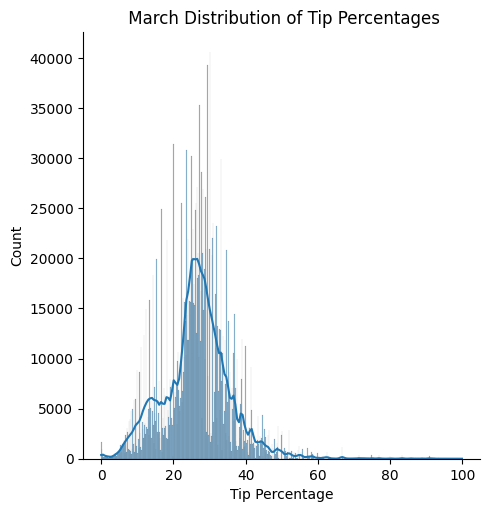

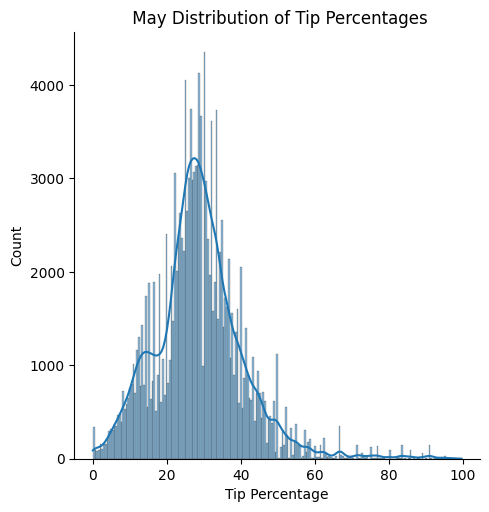

In [ ]:
march_kde = sns.displot(data = march_final, x = 'tip_percentage', kde = True).set(title= ' March Distribution of Tip Percentages')
may_kde = sns.displot(data = may_final, x = 'tip_percentage', kde = True).set(title= ' May Distribution of Tip Percentages')
march_kde.set_axis_labels('Tip Percentage', 'Count')
may_kde.set_axis_labels('Tip Percentage', 'Count')


<Axes: xlabel='fare_amount', ylabel='tip_amount'>

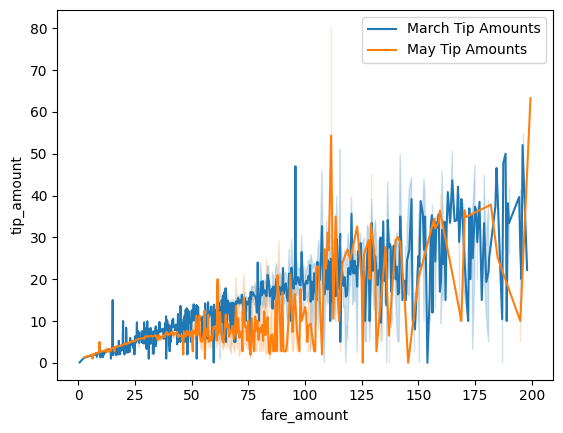

In [ ]:
sns.lineplot(data = march_final, x ='fare_amount', y = 'tip_amount', label = 'March Tip Amounts')
sns.lineplot(data = may_final, x ='fare_amount', y = 'tip_amount', label = 'May Tip Amounts')

<Axes: xlabel='fare_amount', ylabel='tip_amount'>

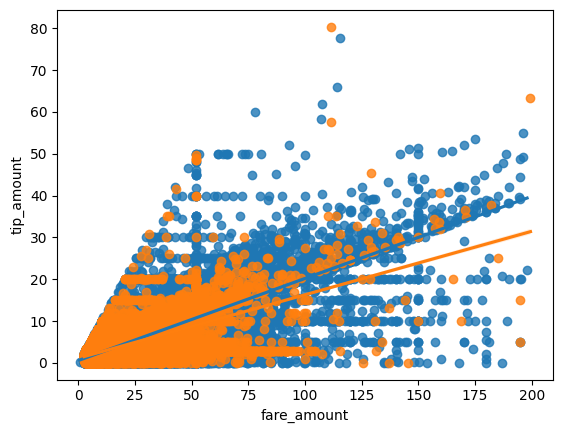

In [ ]:
sns.regplot(data = march_final, x ='fare_amount', y = 'tip_amount')
sns.regplot(data = may_final, x ='fare_amount', y = 'tip_amount')

In [ ]:
march_code = march_final.groupby('RatecodeID')['tip_amount'].mean()
may_code = may_final.groupby('RatecodeID')['tip_amount'].mean()
print(march_code)
print(may_code)

RatecodeID
1.0     2.745770
2.0    11.263549
3.0    14.999689
4.0    14.288428
5.0    11.572487
Name: tip_amount, dtype: float64
RatecodeID
1.0     2.692926
2.0    11.428443
3.0    15.055612
4.0     7.723243
5.0     5.861389
Name: tip_amount, dtype: float64


In [ ]:
march_code_df = march_code.to_frame()
may_code_df = may_code.to_frame()

<Axes: xlabel='RatecodeID', ylabel='tip_amount'>

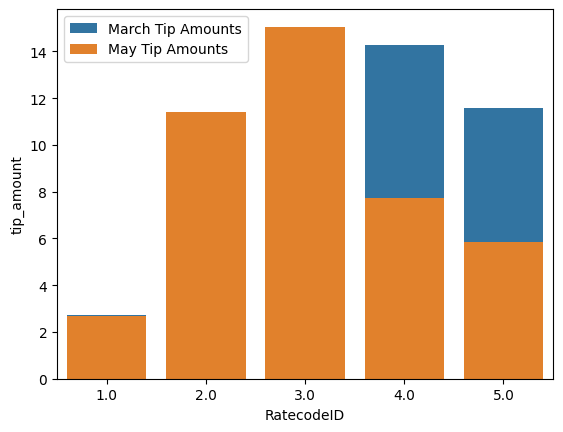

In [ ]:
sns.barplot(data = march_code_df, x = 'RatecodeID', y = 'tip_amount', label = 'March Tip Amounts')
sns.barplot(data = may_code_df, x = 'RatecodeID', y = 'tip_amount', label = 'May Tip Amounts')

[Text(0.5, 1.0, 'March Ratecodes')]

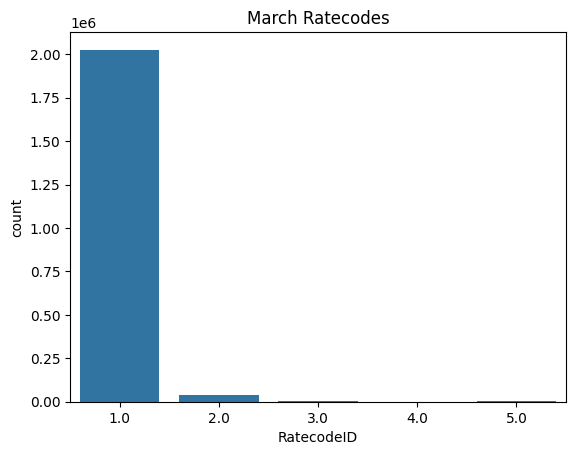

In [ ]:
march_rate_plot = sns.countplot(x='RatecodeID', data = march_final)
march_rate_plot.set(title = 'March Ratecodes')

[Text(0.5, 1.0, 'May Ratecodes')]

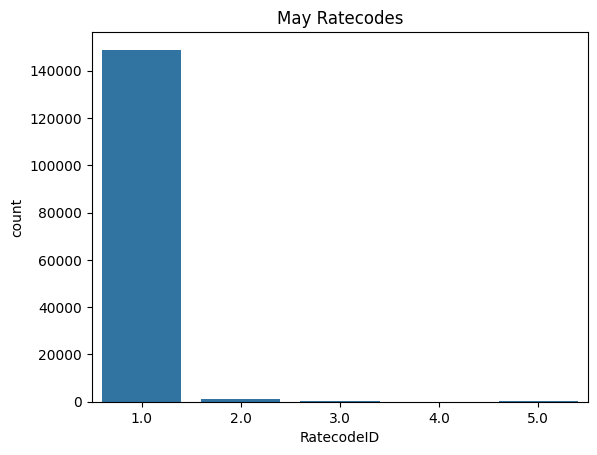

In [ ]:
may_rate_plot = sns.countplot(x='RatecodeID', data = may_final)
may_rate_plot.set(title = 'May Ratecodes')

In [ ]:
january_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

[Text(0.5, 1.0, 'January Ratecodes')]

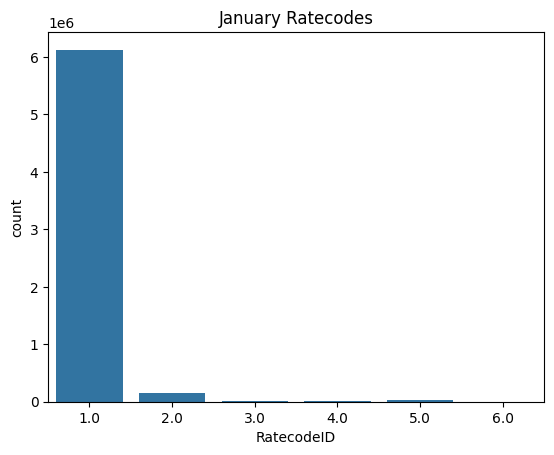

In [ ]:
# drop NaN from RateCodeID and those not between 1 and 6
jan_rate1 = january_df.dropna(subset=['RatecodeID'])
jan_rate = jan_rate1[(jan_rate1['RatecodeID'] <= 6) & (jan_rate1['RatecodeID'] >= 1)]
jan_rate_plot = sns.countplot(x = 'RatecodeID', data = jan_rate)
jan_rate_plot.set(title = 'January Ratecodes')

tfdv schema for march training data

In [ ]:
schema = tfdv.infer_schema(statistics=march_filtered)
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'passenger_count',FLOAT,required,,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,required,,-
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-
'extra',FLOAT,required,,-
'mta_tax',FLOAT,required,,-


,Values
Domain,
'tipped?','yes'


check for anomalies using march data

In [ ]:
difference = tfdv.validate_statistics(statistics = may_filtered, schema = schema)
tfdv.display_anomalies(difference)

no anomalies!